# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [5]:
# Take make moons in built dataset

data_ = datasets.make_moons(100)

In [6]:
# check the dataset

data_

(array([[ 9.60230259e-02,  9.95379113e-01],
        [ 1.46253829e+00, -3.86599306e-01],
        [ 5.18392568e-01,  8.55142763e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [-1.59599895e-01,  9.87181783e-01],
        [ 9.26916757e-01,  3.75267005e-01],
        [ 1.90096887e+00,  6.61162609e-02],
        [ 7.61445958e-01,  6.48228395e-01],
        [ 1.34536505e+00, -4.38468422e-01],
        [-2.84527587e-01,  9.58667853e-01],
        [ 2.05460725e-03,  4.35929780e-01],
        [ 1.57211666e+00, -3.20172255e-01],
        [-9.91790014e-01,  1.27877162e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 8.01413622e-01,  5.98110530e-01],
        [ 3.76510198e-01, -2.81831482e-01],
        [-3.45365054e-01,  9.38468422e-01],
        [ 2.81650650e-01, -1.95682551e-01],
        [ 1.40478334e+00, -4.14412623e-01],
        [-7.18349350e-01,  6.95682551e-01],
        [ 3.27699110e-01, -2.40277997e-01],
        [ 1.28681296e-01,  9.28244800e-03],
        [ 0.00000000e+00,  5.000

In [8]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [ ]:
inputData.head()

,0,1
0,-0.345365,0.938468
1,0.926917,0.375267
2,0.032705,0.246345
3,0.715472,-0.458668
4,-0.032052,0.999486


In [13]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,0
1,1
2,0
3,1
4,0


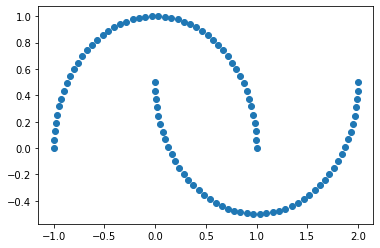

In [14]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])


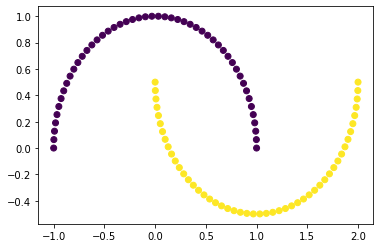

In [15]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0], inputData[1], c = outputData)

In [16]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
# check for labels
model.labels_


array([4, 0, 4, 0, 4, 0, 2, 4, 0, 1, 3, 2, 1, 0, 4, 3, 1, 3, 0, 1, 3, 3,
       3, 1, 2, 4, 3, 0, 3, 0, 2, 3, 4, 2, 4, 0, 0, 1, 2, 4, 2, 3, 4, 2,
       4, 3, 4, 0, 1, 0, 4, 0, 2, 3, 4, 1, 1, 1, 1, 2, 2, 0, 2, 4, 4, 1,
       1, 0, 1, 1, 0, 1, 2, 3, 1, 1, 4, 0, 3, 4, 0, 4, 0, 1, 2, 3, 1, 0,
       4, 2, 3, 3, 1, 0, 4, 2, 4, 0, 0, 2], dtype=int32)

In [18]:
# call metrics and check silhoutte score
from sklearn import metrics
metrics.silhouette_score(inputData, model.labels_)


0.4719546205653542

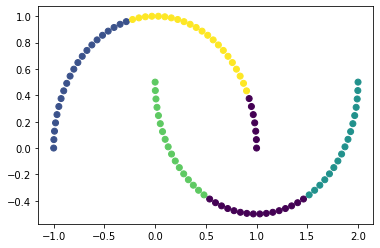

In [19]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0], inputData[1], c = model.labels_)


#### finding right number of cluster

In [ ]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

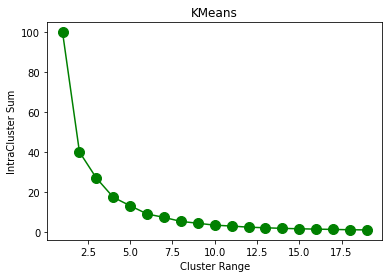

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()